<a href="https://colab.research.google.com/github/imbuoyp/imbuoyp/blob/main/1_Linear_Regression_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
1. import library

In [8]:
#2. read dataset
2-1. feature data
uploaded = files.upload()

Saving boston_house_data.xlsx to boston_house_data.xlsx


In [9]:
boston_house_data_df = pd.read_excel('boston_house_data.xlsx', index_col=0)
print(boston_house_data_df.shape)
boston_house_data_df.head(10)


(506, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [10]:
uploaded = files.upload()

Saving boston_house_target.xlsx to boston_house_target (1).xlsx


In [11]:
#2-2 target data
boston_house_target_df = pd.read_excel('boston_house_target.xlsx', index_col=0)
print(boston_house_target_df.shape)
boston_house_target_df.head(10)

(506, 1)


,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [15]:
#2-3 concat featurea & target df
total_boston_house_data_df = pd.concat([boston_house_data_df, boston_house_target_df], axis=1)
print(total_boston_house_data_df.shape) 
total_boston_house_data_df.head(10)

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [16]:
total_boston_house_data_df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [18]:
total_boston_house_data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
#506 비어있는 값이 없다. 
#표준편차 9 , 평균에서 멀어질수록 구분이 많이된다. 핏쳐로 삼기 적당하다 값이 적당한 값으로 있고 몰려잇지 않기 대문에 적당하다. 
#최소값에 0이 있을 수 없음
#min max 차이 10배
total_boston_house_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [20]:
#널값이 없다는 것이 중요, dtype str나오면, 변경해야함.
# 3.convert dataframe to numpy array(머신학습해줘야 할때 데이터 형태가 array이기 때문에)


In [31]:
feature_array = np.array(boston_house_data_df) #넘파이안에 어래이 함수 써서 자료를 바꿔줘
target_array = np.array(boston_house_target_df)

In [32]:
print(feature_array.ndim)
print(feature_array.shape)

2
(506, 13)


In [95]:
#4.split into training & test set [0:500], [0:1] 1-n이므로 a= [0,1,2]
boston_X = feature_array[:,8:9]
print(boston_X)

[[ 1.]
 [ 2.]
 [ 2.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 3.]
 [ 5.]
 [ 2.]
 [ 5.]
 [ 8.]
 [ 8.]
 [ 8.]
 [ 8.]
 [ 8.]
 [ 8.]
 [ 3.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 5.]

In [96]:
boston_Y = target_array
print(boston_Y)

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [18.5]
 [18.3]
 [21.2]
 [19.2]
 [20.4]
 [19.3]
 [22. ]
 [20.3]
 [20.5]
 [17.3]
 [18.8]


In [100]:
from sklearn import model_selection
 #모델 셀렉션이라는 클래스를 가져옴

In [101]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, boston_Y, test_size=0.3, random_state=42)
 #트레인테스트 스플릿 함수가 있음.test_size라는 파라미터가 있음. 7:3 값뭐로할건지 ,
 #random_state=42(랜덤시드)의미없는 숫자 넣음 관습적


In [102]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(354, 1)
(354, 1)
(152, 1)
(152, 1)


In [103]:
#5. create model object
from sklearn import linear_model
#(리니어 모델 클래스 임포트)
model = linear_model.LinearRegression()

In [104]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
#6. train model object
 

In [105]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
print('Coefficient: ', model.coef_)   #model.coef A값

Coefficient:  [[-0.41803713]]


In [107]:
print('Intercept: ', model.intercept_)

Intercept:  [26.96119226]


In [115]:
print('y = {}x + {}'.format(model.coef_[0][0], model.intercept_[0]))

y = -0.4180371323781254x + 26.96119225783988


In [66]:
# 7. test model object

In [67]:
#predict라는 메소드 사용

In [109]:
model.predict(x_test)
# 괄호 안에 x_test만 넣으면 됨

array([[24.8710066 ],
       [25.28904373],
       [25.28904373],
       [25.28904373],
       [16.92830108],
       [24.8710066 ],
       [25.28904373],
       [25.28904373],
       [16.92830108],
       [24.45296946],
       [24.8710066 ],
       [24.8710066 ],
       [16.92830108],
       [24.8710066 ],
       [24.8710066 ],
       [16.92830108],
       [26.12511799],
       [16.92830108],
       [25.28904373],
       [16.92830108],
       [25.70708086],
       [25.28904373],
       [25.28904373],
       [26.54315513],
       [16.92830108],
       [16.92830108],
       [24.8710066 ],
       [16.92830108],
       [25.28904373],
       [24.45296946],
       [24.8710066 ],
       [24.8710066 ],
       [16.92830108],
       [16.92830108],
       [16.92830108],
       [24.8710066 ],
       [26.12511799],
       [24.8710066 ],
       [25.28904373],
       [25.28904373],
       [24.45296946],
       [24.03493233],
       [25.28904373],
       [25.28904373],
       [26.12511799],
       [16

In [110]:
#model.predict(x_train)


array([[25.70708086],
       [24.45296946],
       [25.70708086],
       [25.28904373],
       [16.92830108],
       [16.92830108],
       [25.70708086],
       [16.92830108],
       [25.70708086],
       [23.6168952 ],
       [24.8710066 ],
       [24.8710066 ],
       [24.8710066 ],
       [25.28904373],
       [24.8710066 ],
       [16.92830108],
       [25.28904373],
       [24.8710066 ],
       [25.28904373],
       [24.8710066 ],
       [24.8710066 ],
       [24.8710066 ],
       [16.92830108],
       [24.45296946],
       [24.45296946],
       [24.8710066 ],
       [24.8710066 ],
       [25.70708086],
       [24.8710066 ],
       [16.92830108],
       [16.92830108],
       [16.92830108],
       [25.28904373],
       [23.6168952 ],
       [16.92830108],
       [25.28904373],
       [16.92830108],
       [25.28904373],
       [16.92830108],
       [24.8710066 ],
       [24.45296946],
       [16.92830108],
       [16.92830108],
       [26.54315513],
       [24.03493233],
       [24

In [111]:
#boston_Y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [75]:
#7-1 mse with pure python

In [119]:
print('MSE(Training data): ', np.mean((model.predict(x_train) - y_train) ** 2))

MSE(Training data):  74.8880735729038


In [120]:
##7-2 MSE with SKlearn

In [122]:
from sklearn.metrics import mean_squared_error
print('MSE(Training data): ', mean_squared_error(model.predict(x_train), y_train))

MSE(Training data):  74.8880735729038


In [123]:
print('MSE(Test data)', mean_squared_error(model.predict(x_test), y_test))

MSE(Test data) 66.3794773612781


In [85]:
#8. visualization

SyntaxError: ignored

In [124]:
%matplotlib inline

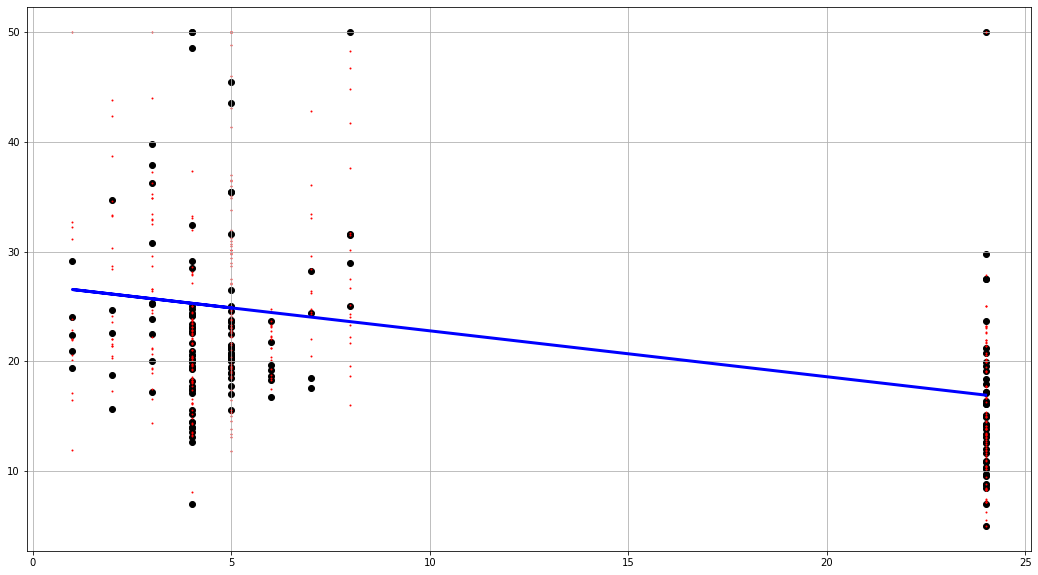

In [126]:
plt.figure(figsize=(18, 10))
plt.scatter(x_test, y_test, color='black')
plt.scatter(x_train, y_train, color='red', s=1)
plt.plot(x_test, model.predict(x_test), color='blue', linewidth=3)  
#x test 기준점, 예측햇을떄 실제와 얼마나 차이나는지
plt.grid()
plt.show()